In [5]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [25]:
df = pd.read_csv("BostonHousing.csv")
print(df.head())

      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


In [11]:
print(df.columns)

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')


In [13]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB
None
             crim          zn       indus        chas         nox          rm  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695   

In [15]:
# Check for missing values
print(df.isnull().sum())

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64


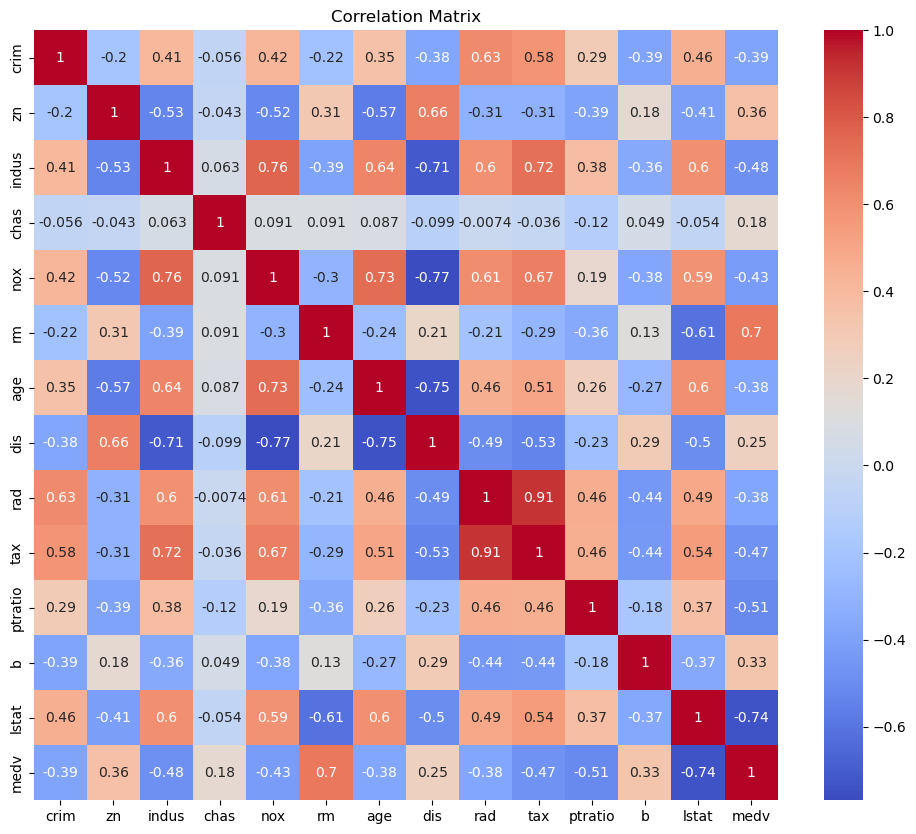

In [17]:
# Correlation matrix
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [19]:
X= df.drop('medv', axis=1) #features
y = df['medv'] #target-(Median value of owner-occupied homes)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
lr= LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [21]:
y_pred = lr.predict(X_test)

In [23]:
print("Mean Squared Error:",mean_squared_error(y_test,y_pred))
print("R-squared:", r2_score(y_test,y_pred))

Mean Squared Error: 24.29111947497345
R-squared: 0.6687594935356329


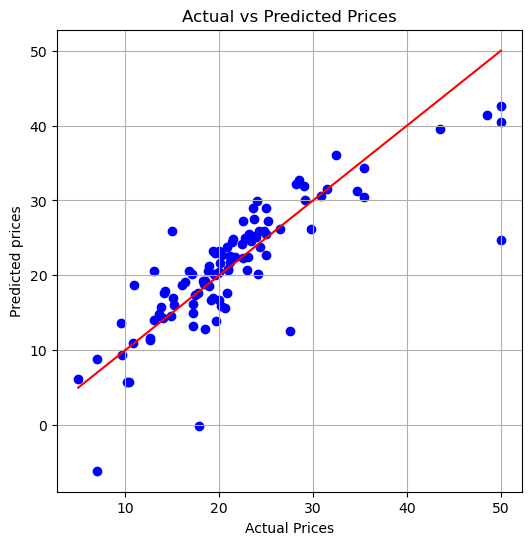

In [27]:
# Visualizing Actual vs Predicted Prices
plt.figure(figsize=(6,6))
plt.scatter(y_test,y_pred, color='blue') #Blue points represent the predictions.
plt.plot([min(y_test),max(y_test)], [min(y_test),max(y_test)], color='red') #Red Line:Represents the ideal case where predicted prices perfectly match actual prices.
plt.xlabel('Actual Prices')
plt.ylabel('Predicted prices')
plt.title('Actual vs Predicted Prices')
plt.grid(True)
plt.show()